<a href="https://colab.research.google.com/github/gusmaomarcos/machine-learning-avancada/blob/main/DeepLearning_Keras_pt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

Foram realizados vários testes, zerando-se vieses, zerando-se pesos, colocando-os aleatórios. Código da instrutora vai e vem, bagunçado.

In [ ]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

Carregando o dataset

In [ ]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()


Exploração dos dados

In [ ]:
len(imagens_treino)
imagens_treino.shape
imagens_teste.shape
len(identificacoes_teste)
identificacoes_treino.min()
identificacoes_treino.max()

9

Exibição dos dados

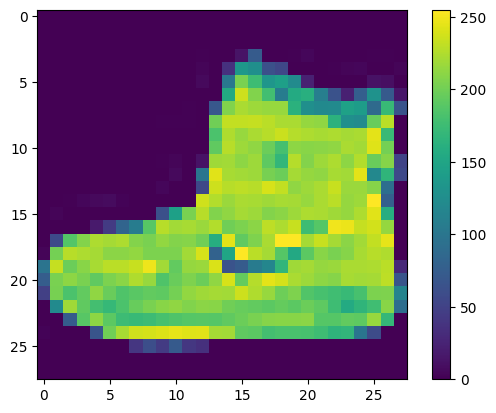

In [ ]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover',
                           'Vestido', 'Casaco', 'Sandália', 'Camisa',
                           'Tênis', 'Bolsa', 'Bota']

plt.imshow(imagens_treino[0])
plt.colorbar()

Normalizando as imagens

In [ ]:
imagens_treino = imagens_treino/float(255)

Criando, compilando, treinando e normalizando o modelo

In [ ]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

adam = keras.optimizers.Adam(lr=0.002)

'''lr
learning rate
taxa de aprendizado'''

parando_cedo = [keras.callbacks.EarlyStopping(monitor='val_loss'),
                keras.callbacks.ModelCheckpoint(filepath='melhor_modelo.hdf5',
                                               monitor='val_loss', save_best_only=True)]

modelo.compile(optimizer=adam,
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino,
                       batch_size = 480,
                       epochs=5, validation_split=0.2,
                       callbacks=parando_cedo)

Epoch 1/5
100/100 [==============================] - 5s 38ms/step - loss: 0.7209 - accuracy: 0.7487 - val_loss: 0.4875 - val_accuracy: 0.8303
Epoch 2/5
  6/100 [>.............................] - ETA: 2s - loss: 0.4916 - accuracy: 0.8240

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


100/100 [==============================] - 3s 32ms/step - loss: 0.4729 - accuracy: 0.8370 - val_loss: 0.4262 - val_accuracy: 0.8509
Epoch 3/5
100/100 [==============================] - 4s 36ms/step - loss: 0.4194 - accuracy: 0.8526 - val_loss: 0.4099 - val_accuracy: 0.8566
Epoch 4/5
100/100 [==============================] - 2s 24ms/step - loss: 0.3855 - accuracy: 0.8644 - val_loss: 0.3736 - val_accuracy: 0.8684
Epoch 5/5
100/100 [==============================] - 2s 17ms/step - loss: 0.3648 - accuracy: 0.8707 - val_loss: 0.3708 - val_accuracy: 0.8698


Sumário do modelo

In [ ]:
sumario_do_modelo = modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Pesos da primeira camada Dense

In [ ]:
pesos_camada_dense = modelo.layers[1].get_weights()[0]
vieses_camada_dense = modelo.layers[1].get_weights()[1]

vieses_camada_dense.shape, pesos_camada_dense.shape

((256,), (784, 256))

Pesos random, Vieses zerados

In [ ]:
vieses_camada_dense_zerados = np.zeros((256,))
pesos_camada_dense_aleatorios = np.random.rand(784, 256)
modelo.layers[1].set_weights([pesos_camada_dense_aleatorios, vieses_camada_dense_zerados])

In [ ]:
'''pesos_camada_dense.shape
pesos_camada_dense_zerados = np.zeros((784, 256))

modelo.layers[1].set_weights(
    [pesos_camada_dense_zerados, vieses_camada_dense]
)

modelo.layers[1].set_weights(
    [pesos_camada_dense_aleatorios, vieses_camada_dense]
)

modelo.layers[1].get_weights()'''

'pesos_camada_dense.shape\npesos_camada_dense_zerados = np.zeros((784, 256))\n\nmodelo.layers[1].set_weights(\n    [pesos_camada_dense_zerados, vieses_camada_dense]\n)\n\nmodelo.layers[1].set_weights(\n    [pesos_camada_dense_aleatorios, vieses_camada_dense]\n)\n\nmodelo.layers[1].get_weights()'

In [ ]:
modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 10s 6ms/step - loss: 63.9646 - accuracy: 0.4110 - val_loss: 7.8287 - val_accuracy: 0.7550
Epoch 2/5
1500/1500 [==============================] - 8s 6ms/step - loss: 16.8411 - accuracy: 0.6292 - val_loss: 5.9858 - val_accuracy: 0.7548
Epoch 3/5
1500/1500 [==============================] - 9s 6ms/step - loss: 7.1524 - accuracy: 0.6800 - val_loss: 2.7429 - val_accuracy: 0.7772
Epoch 4/5
1500/1500 [==============================] - 8s 6ms/step - loss: 3.5635 - accuracy: 0.7063 - val_loss: 2.9873 - val_accuracy: 0.6829
Epoch 5/5
1500/1500 [==============================] - 8s 6ms/step - loss: 2.0015 - accuracy: 0.7342 - val_loss: 1.0604 - val_accuracy: 0.8021


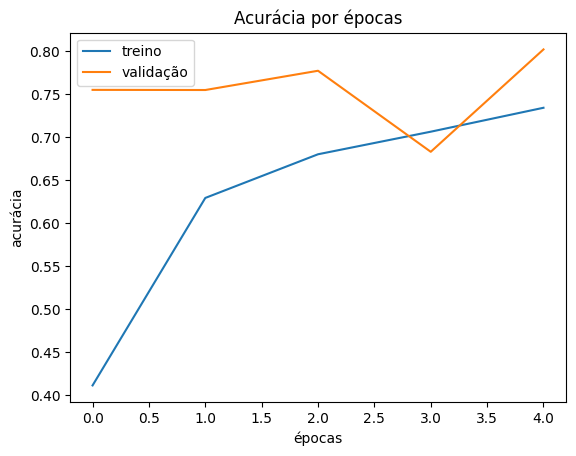

In [ ]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])


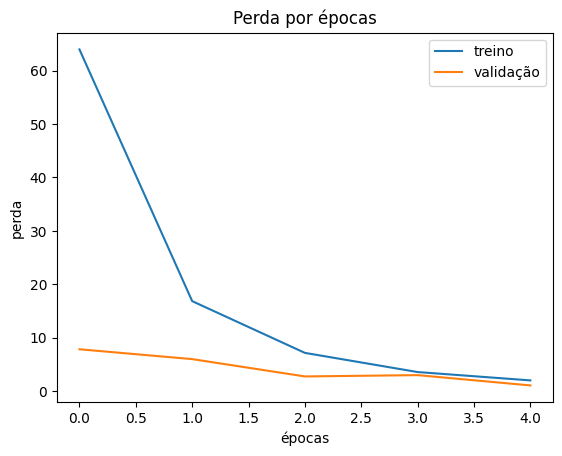

In [ ]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

In [ ]:
modelo.get_config()

{'name': 'sequential',
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'flatten_input'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Flatten',
   'config': {'name': 'flatten',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 28, 28),
    'data_format': 'channels_last'},
   'registered_name': None,
   'build_config': {'input_shape': (None, 28, 28)}},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'units': 256,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Ze

Salvando e carregando o modelo treinado

In [ ]:
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

Visualizando as acurácias de treino e validação por época

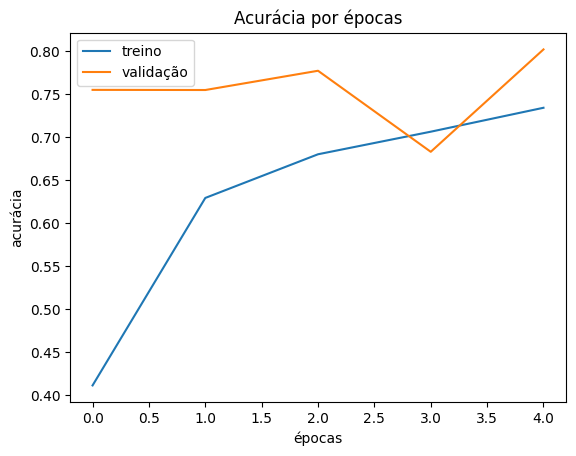

In [ ]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])


Visualizando as perdas de treino e validação por época

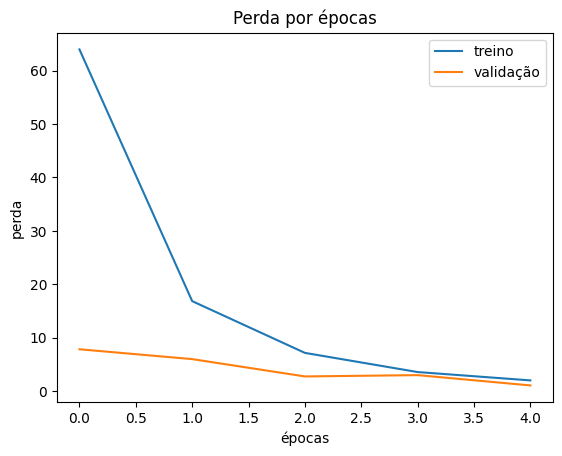

In [ ]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

Testando o modelo e o modelo salvo

In [ ]:
testes = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[1]))
print('número da imagem de teste:', identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste modelo salvo:', np.argmax(testes_modelo_salvo[1]))
print('número da imagem de teste:', identificacoes_teste[1])

313/313 [==============================] - 1s 2ms/step
resultado teste: 2
número da imagem de teste: 2
313/313 [==============================] - 1s 2ms/step
resultado teste modelo salvo: 2
número da imagem de teste: 2


Avaliando o modelo

In [ ]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

313/313 [==============================] - 1s 4ms/step - loss: 285.1152 - accuracy: 0.7692
Perda do teste: 285.11517333984375
Acurácia do teste: 0.7692000269889832
